# EDA

In [ ]:
import pandas as pd
import pandas_profiling
import matplotlib
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

## Chargement des données

In [213]:
df_bc = pd.read_csv('data/dataset_betclic.csv')

In [215]:
df_bc['BirthDate'] = pd.to_datetime(df_bc['BirthDate'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df_bc['FirstDepositDate'] = pd.to_datetime(df_bc['FirstDepositDate'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df_bc['BetDate'] = pd.to_datetime(df_bc['BetDate'], format='%Y%m%d')

## Description de la donnée

Un outil parfait pour les EDA mais très verbeux :
```
pandas_profiling.ProfileReport(df_bc)
```
je prefere ne pas le lancer ici et explorer à la main

### Country

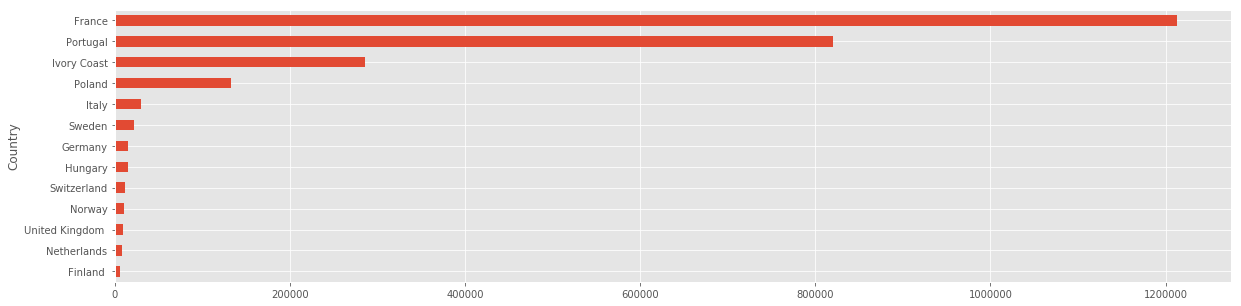

In [7]:
df_bc.groupby('Country')['UserId'].count().sort_values(ascending=True).plot(kind='barh', figsize=(20, 5))

### Gender

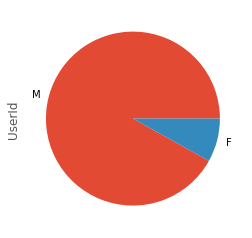

In [41]:
df_bc.groupby('Gender')['UserId'].count().sort_values(ascending=False).plot(kind='pie')

### Birthdate

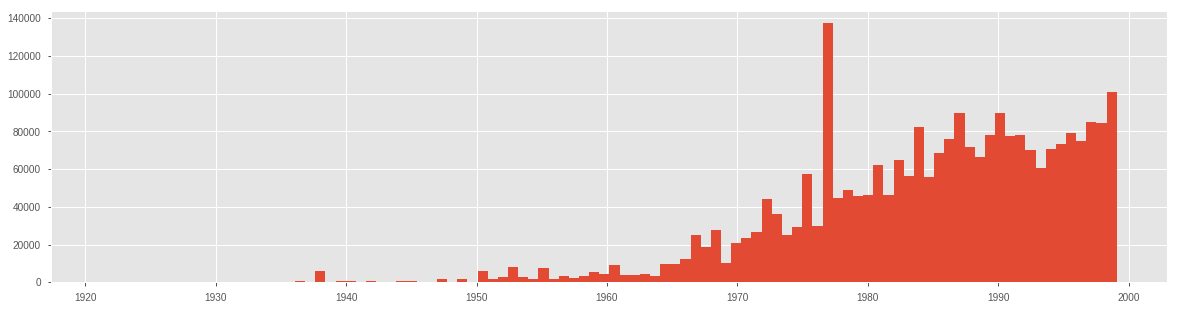

In [67]:
df_bc['BirthDate'].hist(bins=100, figsize=(20, 5))

### Partner type

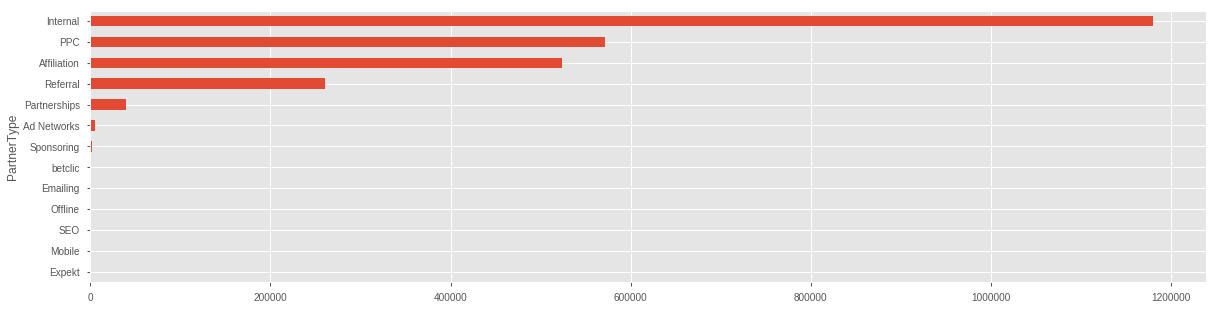

In [68]:
df_bc.groupby('PartnerType')['UserId'].count().sort_values(ascending=True).plot(kind='barh', figsize=(20, 5))

### First deposit date

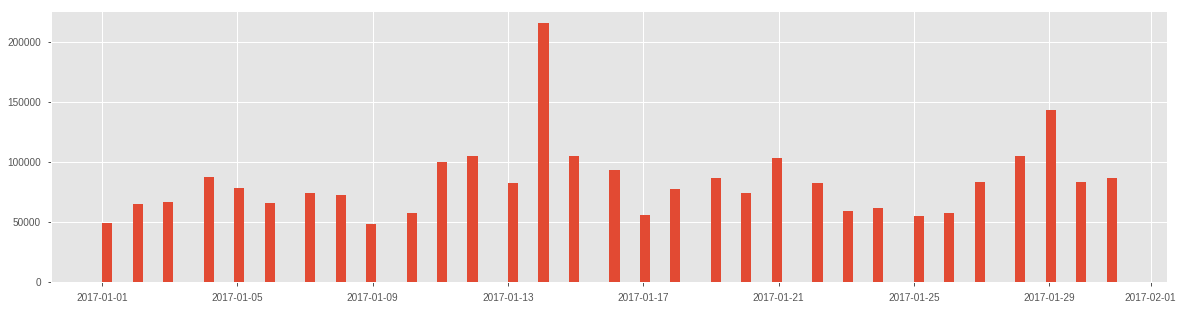

In [75]:
df_bc['FirstDepositDate'].hist(bins=100, figsize=(20, 5))

### Bet date

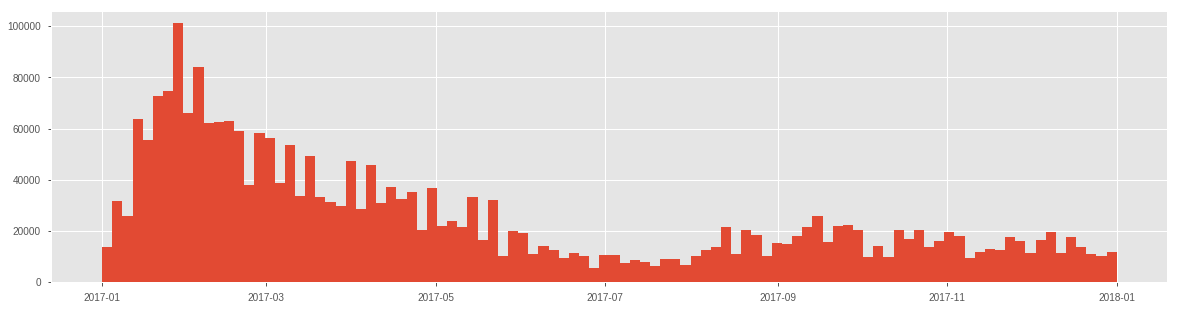

In [70]:
df_bc['BetDate'].hist(bins=100, figsize=(20, 5))

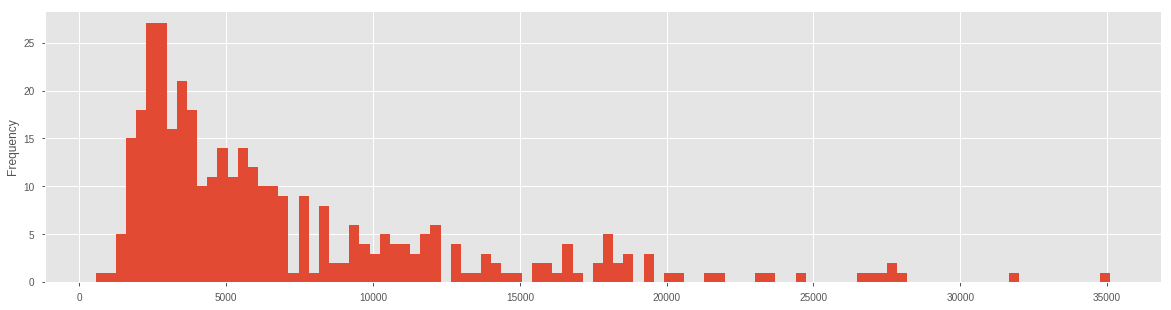

In [80]:
df_bc.groupby('BetDate')['BetId'].count().plot(kind='hist', bins=100, figsize=(20, 5))

### Application

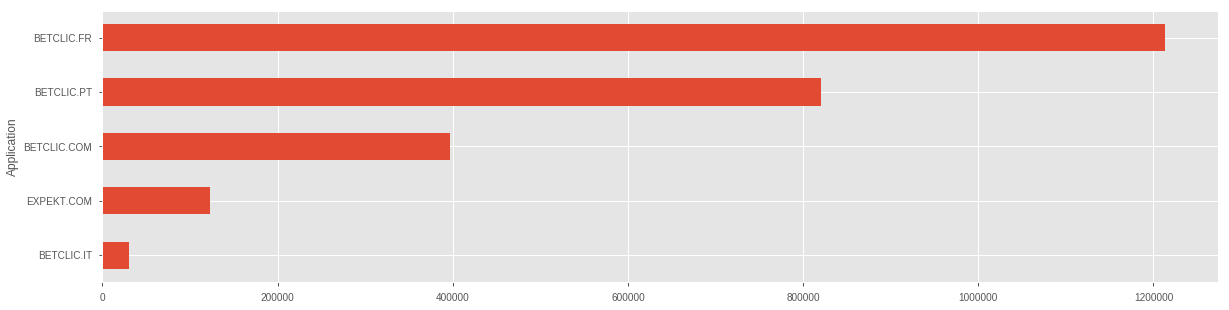

In [81]:
df_bc.groupby('Application')['UserId'].count().sort_values(ascending=True).plot(kind='barh', figsize=(20, 5))

### Product name

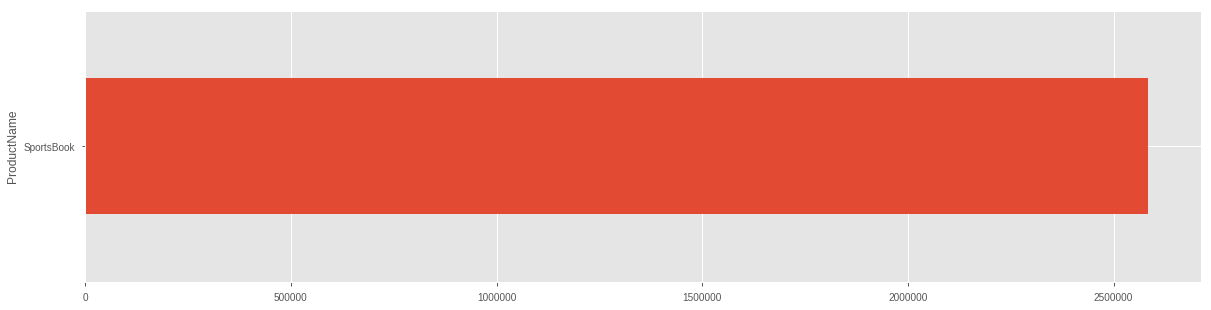

In [82]:
df_bc.groupby('ProductName')['UserId'].count().sort_values(ascending=True).plot(kind='barh', figsize=(20, 5))

### Is live

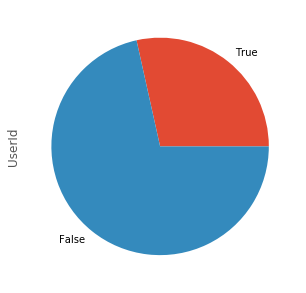

In [42]:
df_bc.groupby('IsLive')['UserId'].count().sort_values(ascending=True).plot(kind='pie', figsize=(20, 5))

### Bet Amount

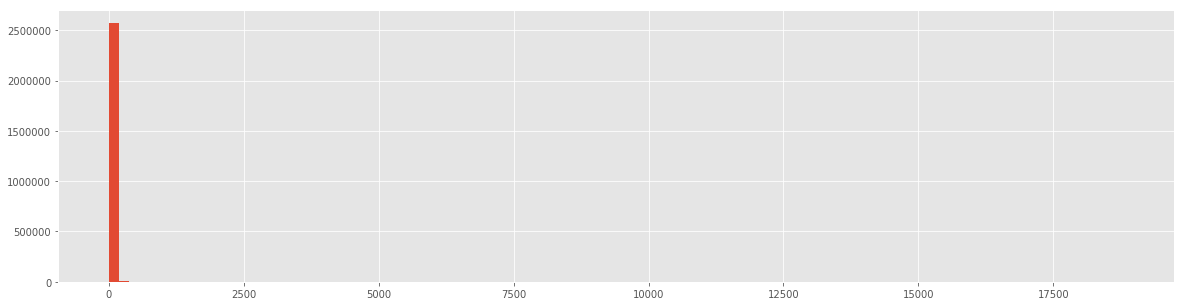

In [15]:
df_bc['BetAmount'].hist(bins=100, bottom=0.1, figsize=(20, 5))


il est impossible de voir quoi que ce soit ici.  
Un changement de referentiel permet d'observer la distribution des bets amount

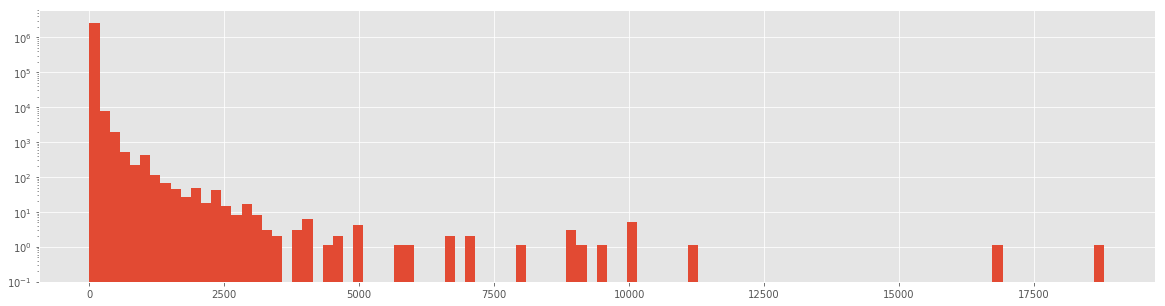

In [12]:
fig, ax = plt.subplots()
df_bc['BetAmount'].hist(ax=ax, bins=100, bottom=0.1, figsize=(20, 5))
ax.set_yscale('log')

### Amount won (mode log)

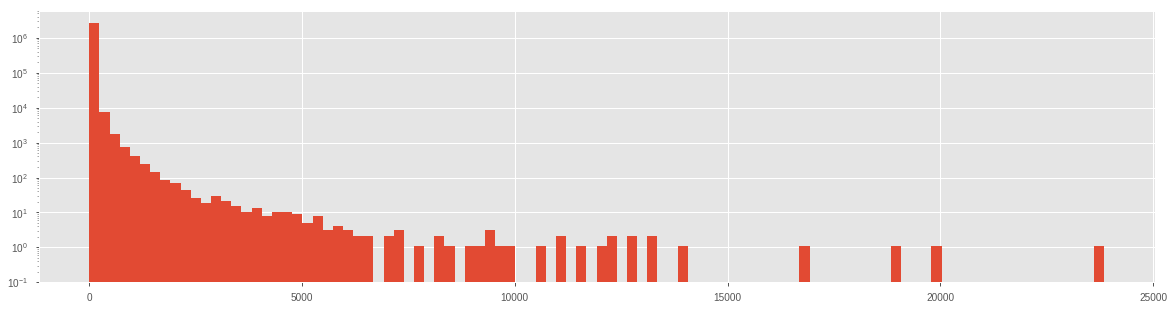

In [90]:
fig, ax = plt.subplots()
df_bc['AmountWon'].hist(ax=ax, bins=100, bottom=0.1, figsize=(20, 5))
ax.set_yscale('log')

### Odds

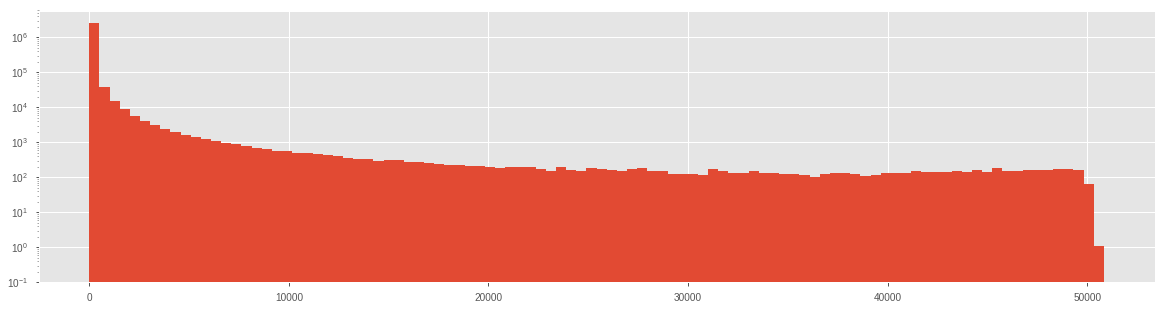

In [92]:
fig, ax = plt.subplots()
df_bc['Odds'].hist(ax=ax, bins=100, bottom=0.1, figsize=(20, 5))
ax.set_yscale('log')

### Cash out

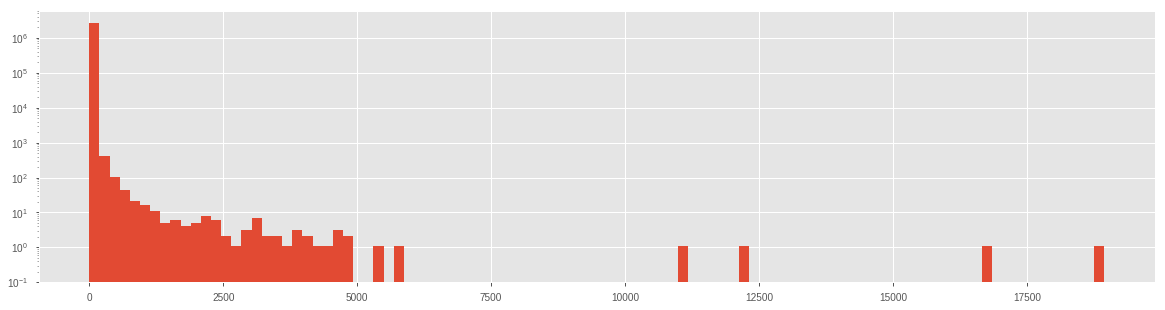

In [94]:
fig, ax = plt.subplots()
df_bc['Cashout'].hist(ax=ax, bins=100, bottom=0.1, figsize=(20, 5))
ax.set_yscale('log')

## Question

### quel est l'age moyen d'un client ?


In [107]:
(df_bc.drop_duplicates(subset='UserId')['BirthDate'] - df_bc.drop_duplicates(subset='UserId')['BirthDate'].min()).mean() + df_bc.drop_duplicates(subset='UserId')['BirthDate'].min()

Timestamp('1988-05-17 03:48:01.834728960')

In [220]:
now = pd.Timestamp(datetime.now())
(now - df_bc.drop_duplicates(subset='UserId')['BirthDate']).astype('<m8[Y]').mean()

30.242082271568986

#### Des femmes ?

In [21]:
(df_bc.drop_duplicates(subset='UserId')[df_bc['Gender']=='F']['BirthDate'] - df_bc.drop_duplicates(subset='UserId')[df_bc['Gender']=='F']['BirthDate'].min()).mean() + df_bc.drop_duplicates(subset='UserId')[df_bc['Gender']=='F']['BirthDate'].min()

/home/tom/source/smart_click/betclic/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Timestamp('1987-05-12 16:17:10.351990528')

#### Des hommes ?

In [22]:
(df_bc.drop_duplicates(subset='UserId')[df_bc['Gender']=='M']['BirthDate'] - df_bc.drop_duplicates(subset='UserId')[df_bc['Gender']=='M']['BirthDate'].min()).mean() + df_bc.drop_duplicates(subset='UserId')[df_bc['Gender']=='M']['BirthDate'].min()

/home/tom/source/smart_click/betclic/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Timestamp('1988-07-16 13:34:52.393093888')

### Quel est le nombre moyen de paris par client ?

In [18]:
df_bc.groupby('UserId')['BetId'].count().mean()

104.50810985721797

### Combien un client pari en moyenne ?

In [121]:
df_bc.groupby(['UserId', 'BetId'])['BetAmount'].sum().mean()

8.323373382295683

### Combien un client gagne en moyenne ?

In [122]:
df_bc.groupby(['UserId', 'BetId'])['AmountWon'].sum().mean()

6.850836186417133

### Montant des paris entré par le client ?

In [126]:
df_bc.drop_duplicates(subset='BetId')['BetAmount'].sum()

21505549.27

### Montant gagné par le client ?

In [127]:
df_bc.drop_duplicates(subset='BetId')['AmountWon'].sum() 

17700875.400000013

### Montant gagné par betclic ?

In [125]:
df_bc.drop_duplicates(subset='BetId')['BetAmount'].sum() - df_bc.drop_duplicates(subset='BetId')['AmountWon'].sum() 

3804673.869999986

### Combien de paris par jours en moyenne ?

In [129]:
df_bc.groupby(['BetDate'])['BetId'].count().mean()

7059.437158469946

### Les femmes gagnent-t-elles plus que les hommes ?

In [143]:
df_bc.groupby(['Gender', 'BetId'])['AmountWon'].sum().reset_index().groupby('Gender')['AmountWon'].mean()

Gender
F    6.513041
M    6.880524
Name: AmountWon, dtype: float64

### Quel pays gagne le plus en proportion ?

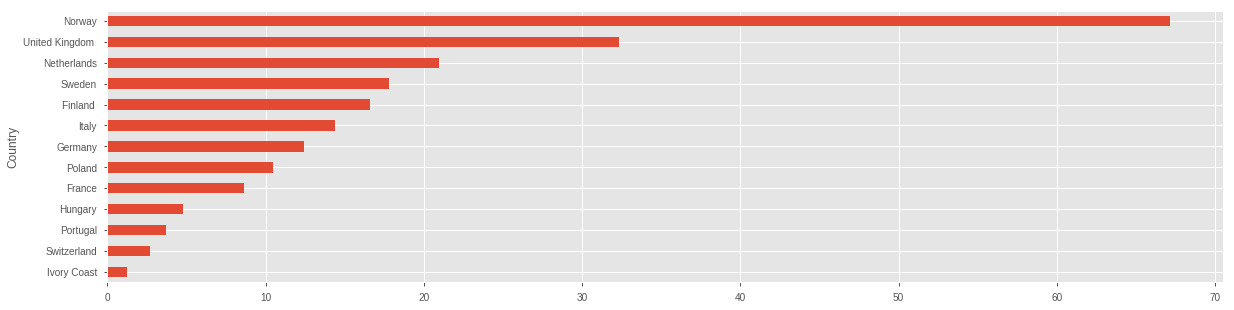

In [152]:
df_bc.groupby(['Country', 'BetId'])['AmountWon'].sum().reset_index().groupby('Country')['AmountWon'].mean().sort_values(ascending=True).plot(kind='barh', figsize=(20, 5))

### Quel pays joue le plus ?

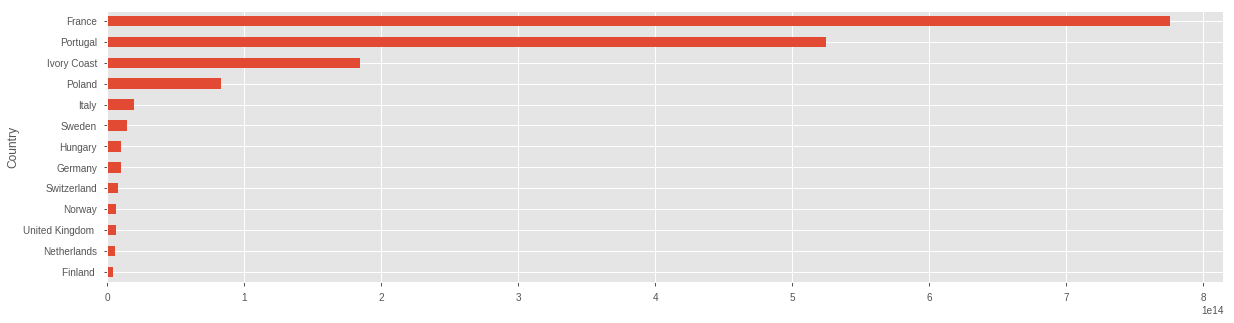

In [153]:
df_bc.groupby(['Country'])['BetId'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(20, 5))